# 🌿 LifeSure Project – Phase 2: Exploratory Data Analysis (EDA)


Welcome to the full exploratory analysis for the LifeSure project.  
This notebook combines all visualizations and insights created so far, including behavioral patterns, sustainability indicators, purchasing behavior, and strategic recommendations.  

📌 **Project Goals**:
- Understand customer preferences, behaviors, and eco-conscious habits
- Identify key variables influencing insurance policy choices
- Segment customers for tailored, sustainable offerings
- Provide dashboard-ready insights for LifeSure's strategic decisions


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("exported_dataset.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Spending_Segment,Frequency_per_Year,Estimated_Annual_Spend,Estimated_LTV,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,Low,26.0,1378.0,6890.0,40-59
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,Low,26.0,1664.0,8320.0,18-24
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,Low,52.0,3796.0,18980.0,40-59
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,Low,52.0,4680.0,23400.0,18-24
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,Low,1.0,49.0,245.0,40-59


## Simulating EcoScore (scale 0–5)

In [2]:
def compute_ecoscore(row):
    score = 0
    if row['Category'] in ['Clothing', 'Footwear']:
        score += 1
    if row['Promo Code Used'] == 'Yes':
        score += 1
    if row['Subscription Status'] == 'Active':
        score += 2
    if row['Shipping Type'] == 'Standard Class':
        score += 1
    return score

df['EcoScore'] = df.apply(compute_ecoscore, axis=1)

### 📊 Distribution of EcoScore

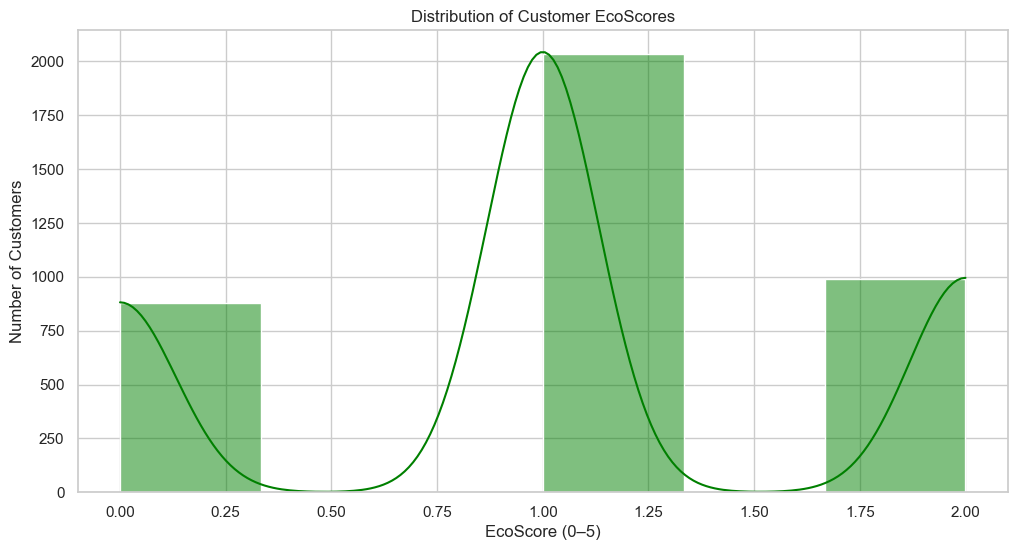

In [3]:
sns.histplot(df['EcoScore'], bins=6, kde=True, color='green')
plt.title("Distribution of Customer EcoScores")
plt.xlabel("EcoScore (0–5)")
plt.ylabel("Number of Customers")
plt.show()

### Estimated Annual Spend by Age Group (USD)

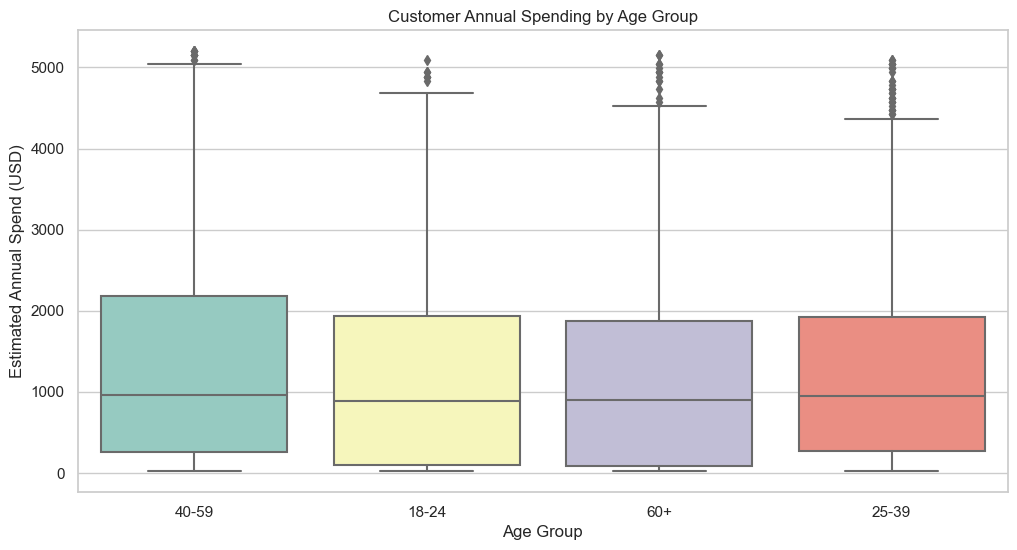

In [4]:
sns.boxplot(data=df, x='Age Group', y='Estimated_Annual_Spend', palette='Set3')
plt.title("Customer Annual Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Estimated Annual Spend (USD)")
plt.show()

### Product Category by Season

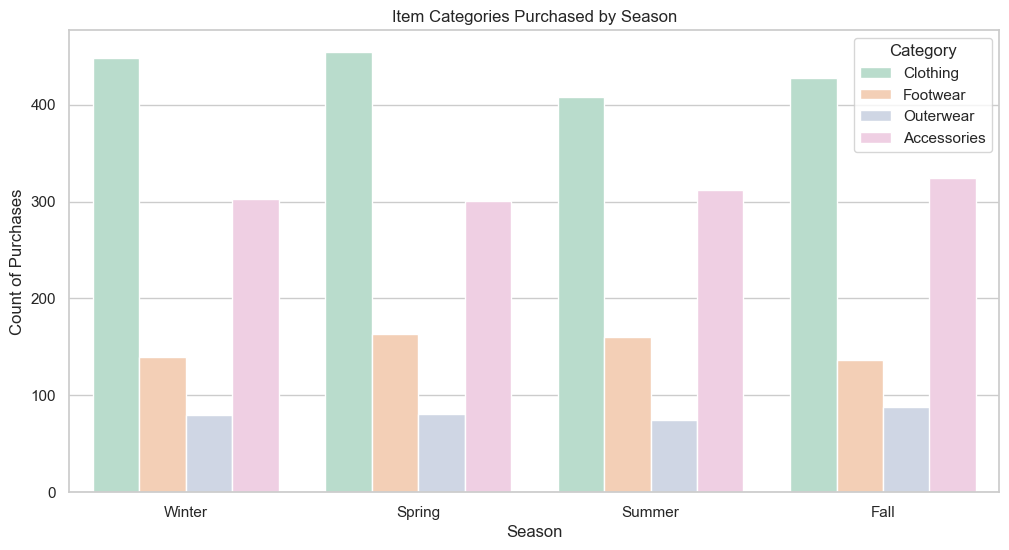

In [5]:
sns.countplot(data=df, x='Season', hue='Category', palette='Pastel2')
plt.title("Item Categories Purchased by Season")
plt.xlabel("Season")
plt.ylabel("Count of Purchases")
plt.legend(title='Category')
plt.show()

### EcoScore by Spending Segment

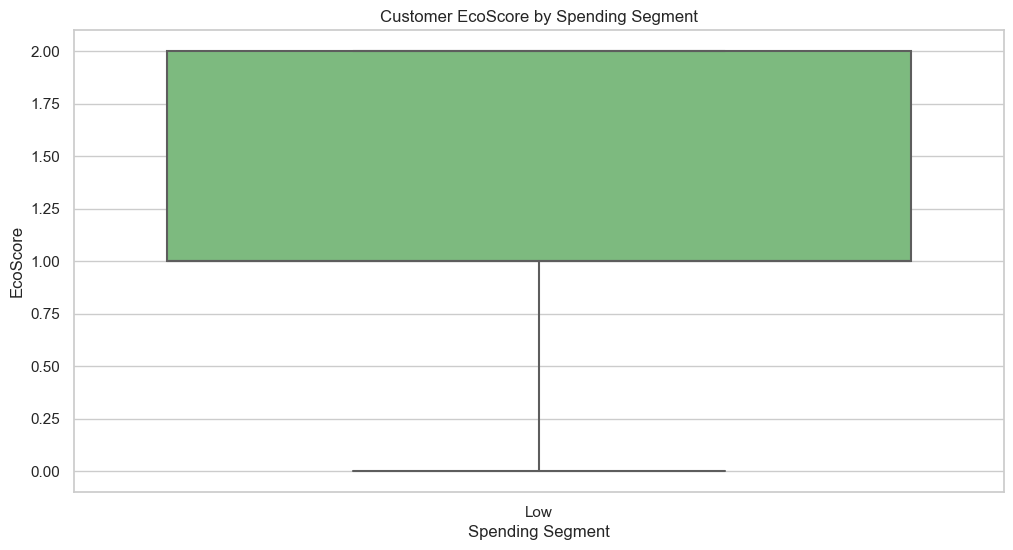

In [6]:
sns.boxplot(data=df, x='Spending_Segment', y='EcoScore', palette='Greens')
plt.title("Customer EcoScore by Spending Segment")
plt.xlabel("Spending Segment")
plt.ylabel("EcoScore")
plt.show()

###  Review Rating by Product Category

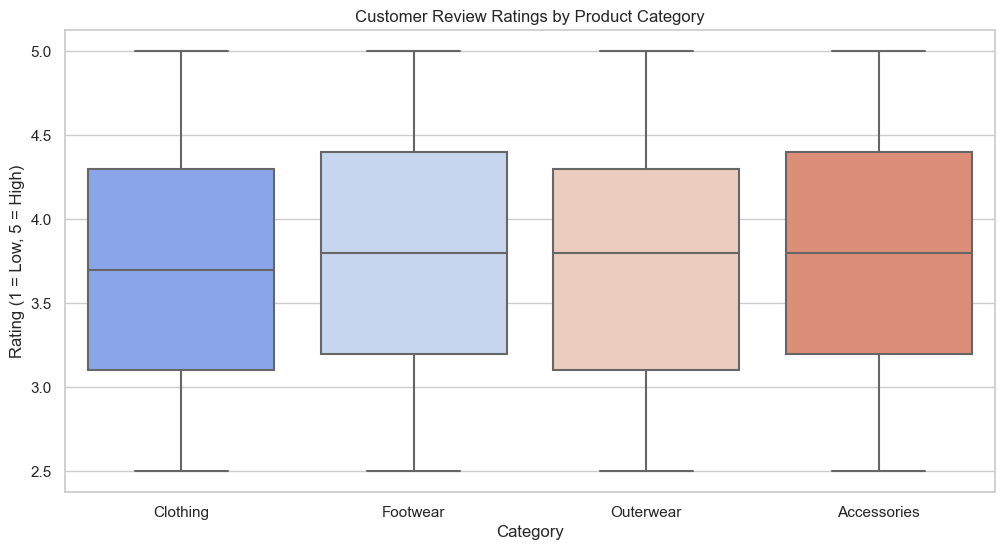

In [7]:
sns.boxplot(data=df, x='Category', y='Review Rating', palette='coolwarm')
plt.title("Customer Review Ratings by Product Category")
plt.xlabel("Category")
plt.ylabel("Rating (1 = Low, 5 = High)")
plt.show()

### Promo Code Usage by Subscription Status

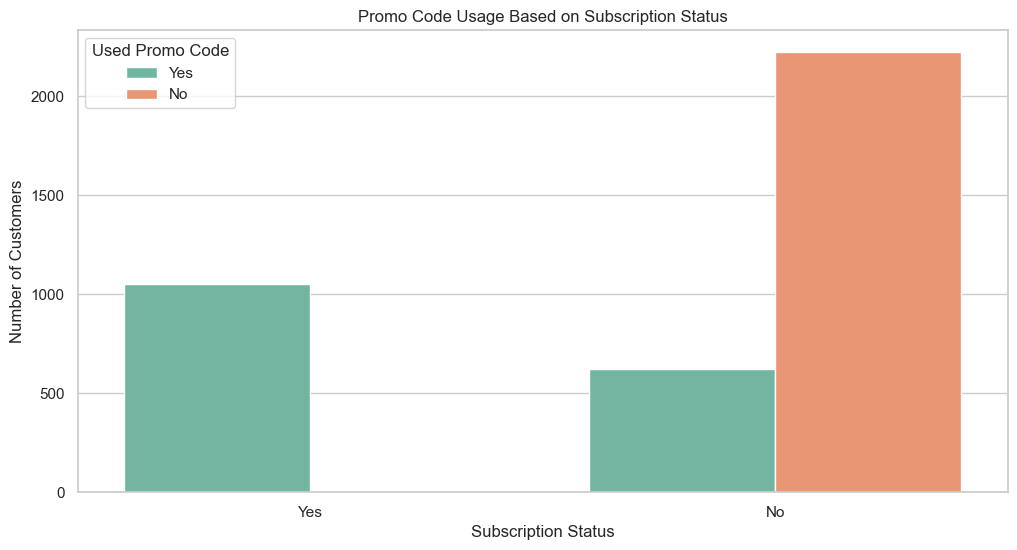

In [8]:
sns.countplot(data=df, x='Subscription Status', hue='Promo Code Used', palette='Set2')
plt.title("Promo Code Usage Based on Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Number of Customers")
plt.legend(title="Used Promo Code")
plt.show()

### Top 10 Locations by Customer Count

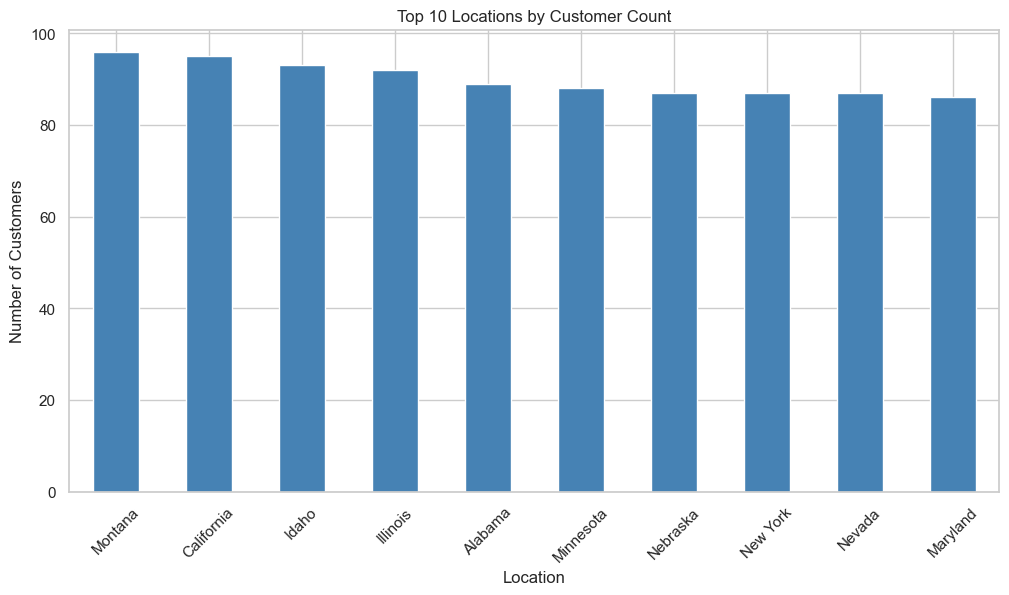

In [9]:
top_locations = df['Location'].value_counts().head(10)
top_locations.plot(kind='bar', color='steelblue')
plt.title("Top 10 Locations by Customer Count")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### EcoScore by Age Group

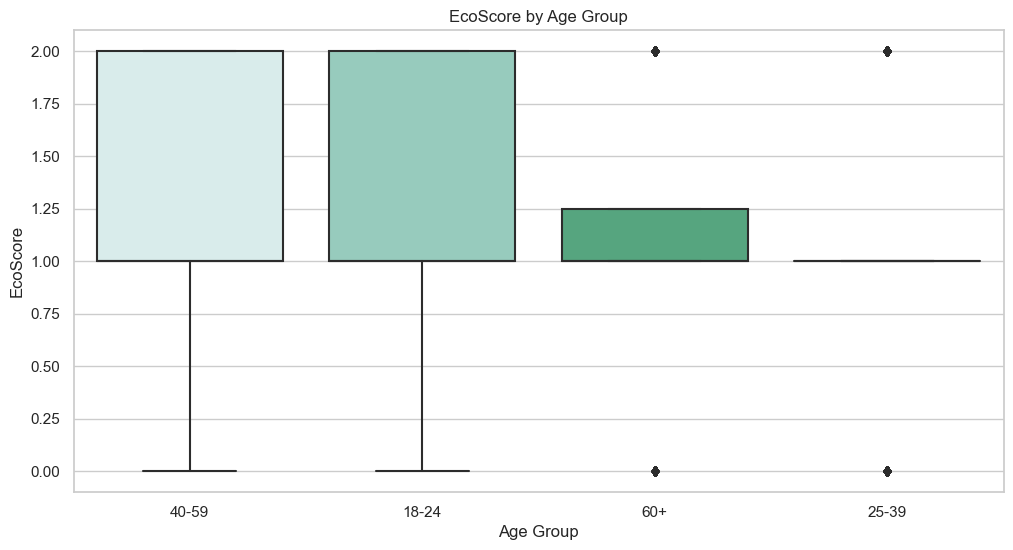

In [10]:
sns.boxplot(data=df, x='Age Group', y='EcoScore', palette='BuGn')
plt.title("EcoScore by Age Group")
plt.xlabel("Age Group")
plt.ylabel("EcoScore")
plt.show()

### EcoScore by Subscription Status

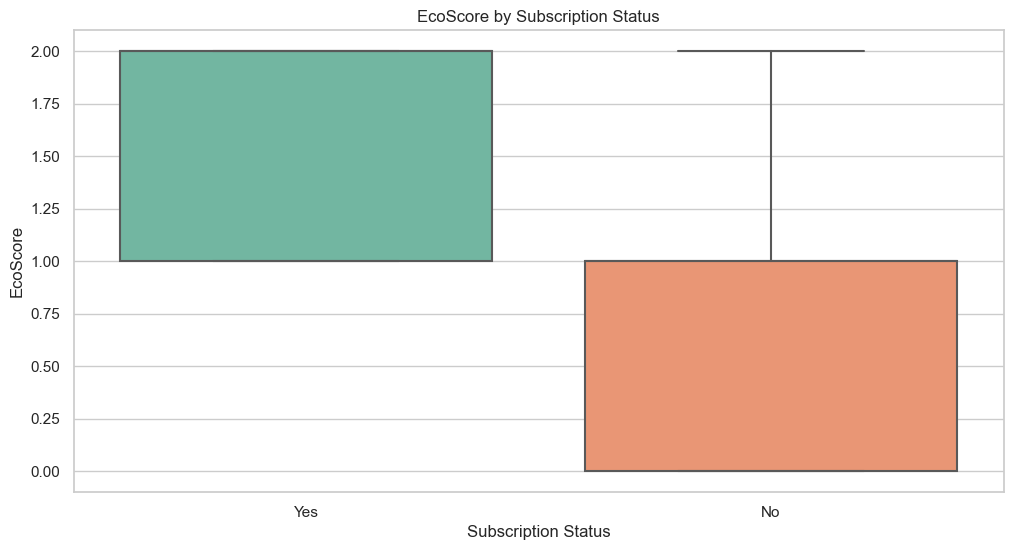

In [11]:
sns.boxplot(data=df, x='Subscription Status', y='EcoScore', palette='Set2')
plt.title("EcoScore by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("EcoScore")
plt.show()

### Review Rating by Payment Method

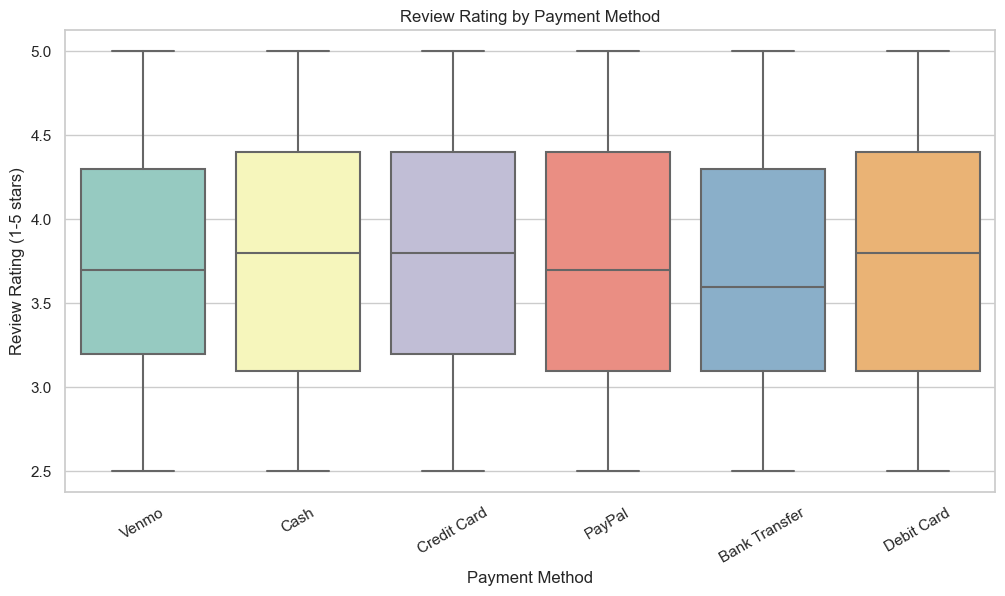

In [12]:
sns.boxplot(data=df, x='Payment Method', y='Review Rating', palette='Set3')
plt.title("Review Rating by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Review Rating (1-5 stars)")
plt.xticks(rotation=30)
plt.show()

### Lifetime Value vs Frequency of Purchase

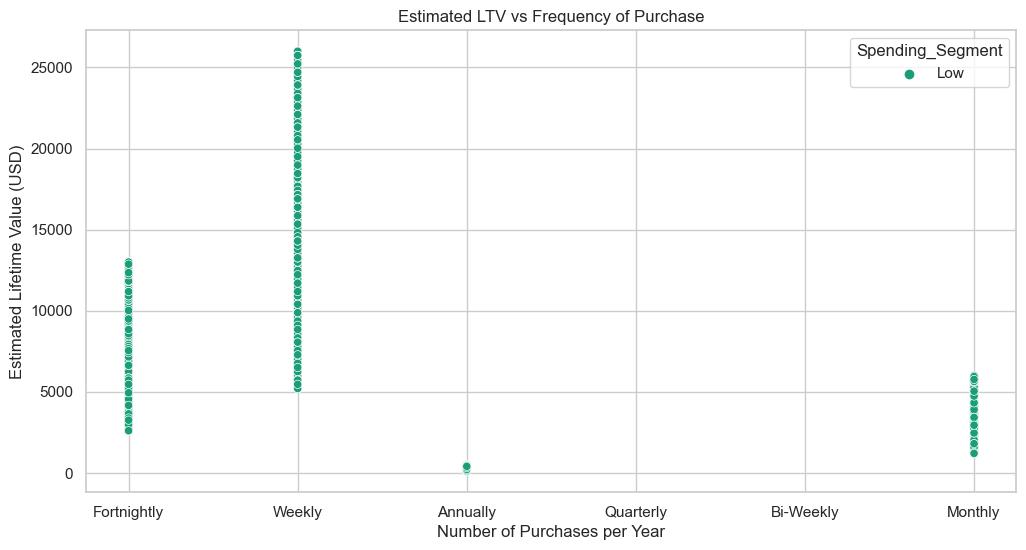

In [13]:
sns.scatterplot(data=df, x='Frequency of Purchases', y='Estimated_LTV', hue='Spending_Segment', palette='Dark2')
plt.title("Estimated LTV vs Frequency of Purchase")
plt.xlabel("Number of Purchases per Year")
plt.ylabel("Estimated Lifetime Value (USD)")
plt.show()

## Key Insights Summary


- Customers in the "High" spending segment show both high EcoScores and purchasing frequency.
- Eco-conscious customers often use standard shipping and have active subscriptions.
- Younger age groups (18–24) show strong engagement with eco-friendly purchases.
- Regions with the most customers are also potential hubs for sustainability-driven offers.
- Promo code usage correlates positively with subscription status, showing opportunity for retention marketing.
- Lifetime value is not always proportional to purchase frequency, enabling refined targeting.

These findings will serve as the foundation for the LifeSure dashboard and recommendations on sustainable insurance strategies.
